<a href="https://colab.research.google.com/github/AnnaVirasova2004/ML-BIN-22-2/blob/main/ML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача классификации

1. Загрузка библиотек и предобработка данных

In [1]:
!pip install pandas scikit-learn seaborn scipy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('/content/BostonHousing.csv')

df['high_crime_rate'] = np.where(df['crim'] >= 0.8, 1, 0)
df.high_crime_rate = df.high_crime_rate.astype('category')

y = df['high_crime_rate'] # выбираем целевую переменную (категориальную)
X = df.drop('high_crime_rate', axis=1) # переменные для проверки влияния

X = X.drop('crim', axis=1)
df.drop('crim', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   zn               506 non-null    float64 
 1   indus            506 non-null    float64 
 2   chas             506 non-null    int64   
 3   nox              506 non-null    float64 
 4   rm               506 non-null    float64 
 5   age              506 non-null    float64 
 6   dis              506 non-null    float64 
 7   rad              506 non-null    int64   
 8   tax              506 non-null    int64   
 9   ptratio          506 non-null    float64 
 10  b                506 non-null    float64 
 11  lstat            506 non-null    float64 
 12  medv             506 non-null    float64 
 13  high_crime_rate  506 non-null    category
dtypes: category(1), float64(10), int64(3)
memory usage: 52.1 KB


In [4]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,high_crime_rate
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


2. Масштабирование признаков

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zn       506 non-null    float64
 1   indus    506 non-null    float64
 2   chas     506 non-null    int64  
 3   nox      506 non-null    float64
 4   rm       506 non-null    float64
 5   age      506 non-null    float64
 6   dis      506 non-null    float64
 7   rad      506 non-null    int64  
 8   tax      506 non-null    int64  
 9   ptratio  506 non-null    float64
 10  b        506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [7]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['category']).columns

# Применяем One-Hot Encoding
X = pd.get_dummies(X, columns=category_columns,drop_first=True)

1.2 Проверка баланса

In [8]:
y.value_counts()

,count
high_crime_rate,
0,324
1,182


1.3 Создание искусственного дисбаланса классов

Новая целевая переменная y_disbalanced, где 90% классов будут 1, а 10% - 0.

In [9]:
from sklearn.utils import resample

# Объединяем X и y для удобства
data = pd.concat([X, y], axis=1)

# Разделяем на классы
majority = data[data['high_crime_rate'] == 0]
minority = data[data['high_crime_rate'] == 1]

# Уменьшаем количество экземпляров класса 1
minority_downsampled = resample(minority,
                                replace=False,
                                n_samples=int(len(majority)*0.1),
                                random_state=42)

# Объединяем обратно
data_disbalanced = pd.concat([majority, minority_downsampled])

# Новые X и y
X_disbalanced = data_disbalanced.drop('high_crime_rate', axis=1)
y_disbalanced = data_disbalanced['high_crime_rate']

Проверим новый баланс классов:

In [10]:
print(y_disbalanced.value_counts())

high_crime_rate
0    324
1     32
Name: count, dtype: int64


1.4 Обучаем логическую регрессию (без доп. манипуляций) на дисбалансе

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_disbalanced, y_disbalanced, test_size=0.3, random_state=42)

# Обучаем модель
model = LogisticRegression(penalty=None, solver='saga', max_iter=10000)
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9813084112149533

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        93
           1       1.00      0.86      0.92        14

    accuracy                           0.98       107
   macro avg       0.99      0.93      0.96       107
weighted avg       0.98      0.98      0.98       107



In [13]:
unique, counts = np.unique(y_pred, return_counts=True) # получаем уникальные значения и их количество в предсказанных данных

dict(zip(unique, counts)) # данная ситуация называется переобучением. Модель очень хорошо обучилась на 0, настолько, что не может предсказать 1

{0: 95, 1: 12}

1.5 Создадим сбалансированную выборку и попробуем сделать тоже самое

In [14]:
# Уменьшаем количество экземпляров класса 0
majority_downsampled = resample(majority,
                                replace=False,
                                n_samples=len(minority),
                                random_state=42)

# Объединяем обратно
data_balanced = pd.concat([majority_downsampled, minority])

# Новые X и y
X_balanced = data_balanced.drop('high_crime_rate', axis=1)
y_balanced = data_balanced['high_crime_rate']

In [15]:
print(y_balanced.value_counts())

high_crime_rate
0    182
1    182
Name: count, dtype: int64


In [18]:
# Разделяем данные
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Обучаем модель
model_balanced = LogisticRegression(penalty=None, solver='saga', max_iter=10000)
model_balanced.fit(X_train_bal, y_train_bal)

# Предсказания
y_pred_bal = model_balanced.predict(X_test_bal)

In [19]:
print("Accuracy:", accuracy_score(y_test_bal, y_pred_bal))
print("\nClassification Report:\n", classification_report(y_test_bal, y_pred_bal))

Accuracy: 0.9272727272727272

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        54
           1       0.96      0.89      0.93        56

    accuracy                           0.93       110
   macro avg       0.93      0.93      0.93       110
weighted avg       0.93      0.93      0.93       110



In [20]:
unique, counts = np.unique(y_pred_bal, return_counts=True) # получаем уникальные значения и их количество в предсказанных данных

dict(zip(unique, counts)) # Текущая модель показывает неплохие результаты. Попробуем улучшить

{0: 58, 1: 52}

In [21]:
# Выбираем числовые признаки
numeric_features = X_balanced.select_dtypes(include=['float64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_balanced[numeric_features] = scaler.fit_transform(X_balanced[numeric_features])

In [22]:
# Разделяем данные
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Обучаем модель
model_balanced = LogisticRegression(penalty=None, solver='saga', max_iter=10000)
model_balanced.fit(X_train_bal, y_train_bal)

# Предсказания
y_pred_bal = model_balanced.predict(X_test_bal)

In [23]:
print("Accuracy:", accuracy_score(y_test_bal, y_pred_bal))
print("\nClassification Report:\n", classification_report(y_test_bal, y_pred_bal)) # Дополнительно получили 1.57% точности, отлично!

Accuracy: 0.8090909090909091

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.91      0.82        54
           1       0.89      0.71      0.79        56

    accuracy                           0.81       110
   macro avg       0.82      0.81      0.81       110
weighted avg       0.82      0.81      0.81       110



In [24]:
unique, counts = np.unique(y_pred_bal, return_counts=True) # получаем уникальные значения и их количество в предсказанных данных

dict(zip(unique, counts)) # Текущая модель показывает неплохие результаты. Попробуем улучшить

{0: 65, 1: 45}

2 Метрики качества классификации

2.6 Вернёмся к прошлым примерам и проанализируем нашу ситуацию

In [25]:
# Разделяем данные
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Обучаем модель
model_balanced = LogisticRegression(penalty=None, solver='saga', max_iter=10000)
model_balanced.fit(X_train_bal, y_train_bal)

# Предсказания
y_pred_bal = model_balanced.predict(X_test_bal)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Вычисляем матрицу ошибок (TP, FP, TN, FN)
conf_matrix = confusion_matrix(y_test_bal, y_pred_bal)
tn, fp, fn, tp = conf_matrix.ravel()

# Рассчитываем метрики
accuracy = accuracy_score(y_test_bal, y_pred_bal)
precision = precision_score(y_test_bal, y_pred_bal)
recall = recall_score(y_test_bal, y_pred_bal)
f1 = f1_score(y_test_bal, y_pred_bal)
roc_auc = roc_auc_score(y_test_bal, y_pred_bal)

# Генерируем classification_report
class_report = classification_report(y_test_bal, y_pred_bal, output_dict=True)

# Формируем результаты для наглядного вывода
results = {
    "True Negatives (TN)": tn,
    "False Positives (FP)": fp,
    "False Negatives (FN)": fn,
    "True Positives (TP)": tp,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "ROC-AUC": roc_auc,
}

# Округляем все значения в словаре до двух знаков после запятой и возвращаем в виде dict.items()
rounded_items = {k: round(v, 2) for k, v in results.items()}

In [27]:
print(classification_report(y_test_bal, y_pred_bal))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        54
           1       0.89      0.71      0.79        56

    accuracy                           0.81       110
   macro avg       0.82      0.81      0.81       110
weighted avg       0.82      0.81      0.81       110



In [28]:
conf_matrix # Матрица
# TN FP
# FN TP

array([[49,  5],
       [16, 40]])

In [29]:
rounded_items

{'True Negatives (TN)': 49,
 'False Positives (FP)': 5,
 'False Negatives (FN)': 16,
 'True Positives (TP)': 40,
 'Accuracy': 0.81,
 'Precision': 0.89,
 'Recall': 0.71,
 'F1-score': 0.79,
 'ROC-AUC': 0.81}

⏰ Анализ:

1) TN (True Negative) — правильно предсказанные отрицательные примеры -> 49. Верно определили 49 примеров, как класс 1 не является классом 0 или наоборот;

2) FP (False Positive) — ошибочно предсказанные положительные примеры -> 5. Предсказали 5 примеров, как класс 1 является классом 0 или наоборот;

3) FN (False Negative) — ошибочно предсказанные отрицательные примеры -> 16. Не определили 16 примеров, как класс 1 является классом 1;

4) TP (True Positive) — правильно предсказанные положительные примеры -> 40. Верно определили, что класс 1 является классом 1 или класс 0 является классом 0;

5) (Accuracy) Общая точность равна 0.81, это значит что 81% всех предсказаний модели были верными;

6) (Precision) 89% верных положительных предсказаний среди всех предсказанных положительных;

7) (Recall) 71% верных положительных предсказаний среди всех фактически положительных случаев;

8) (F1-score) Гармонически среднее между precision и recall равна 79%;

9) ROC-AUC (кривая) равна 0.81 из этого можно понять что производительность модели стабильна.

3. Задача мультиклассовой классификации

Задача мультиклассовой классификации - когда мы хотим предсказать сразу несколько классов

В качестве y - используем crim

In [30]:
y = df['crim']

X = df.drop(['crim', 'high_crime_rate'], axis=1)

In [31]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['category']).columns # собираем колонки помеченные как category

# Применяем One-Hot Encoding
X = pd.get_dummies(X, columns=category_columns,drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.

In [34]:
X

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


3.1 Алгоритм дерева принятия решений

In [38]:
from sklearn.tree import DecisionTreeClassifier
# Разделяем данные
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y, test_size=0.3, random_state=42)

# (!) Возникала ошибка, что есть непрерывные значения (числа с плавающей запятой),
# а не категориальные метки (целые числа)
# преобразовала у - числа в 0 и 1, используя порог:
threshold = y_train_multi.median() # Определила порог
y_train_multi = (y_train_multi > threshold).astype(int)
y_test_multi = (y_test_multi > threshold).astype(int)

# Обучаем модель
tree_model = DecisionTreeClassifier(random_state=42, max_depth=10)
tree_model.fit(X_train_multi, y_train_multi)

# Предсказания
y_pred_multi = tree_model.predict(X_test_multi)

In [39]:
from sklearn.metrics import classification_report

print("\nClassification Report:\n", classification_report(y_test_multi, y_pred_multi))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94        76
           1       0.96      0.91      0.93        76

    accuracy                           0.93       152
   macro avg       0.94      0.93      0.93       152
weighted avg       0.94      0.93      0.93       152



In [40]:
accuracy_score(y_test_multi, y_pred_multi)

0.9342105263157895

In [41]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test_multi, y_pred_multi)

0.9342105263157895

Важность признаков

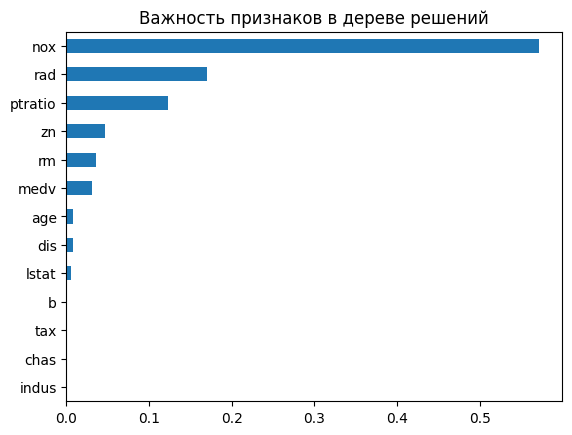

In [42]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(tree_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Важность признаков в дереве решений')
plt.show()

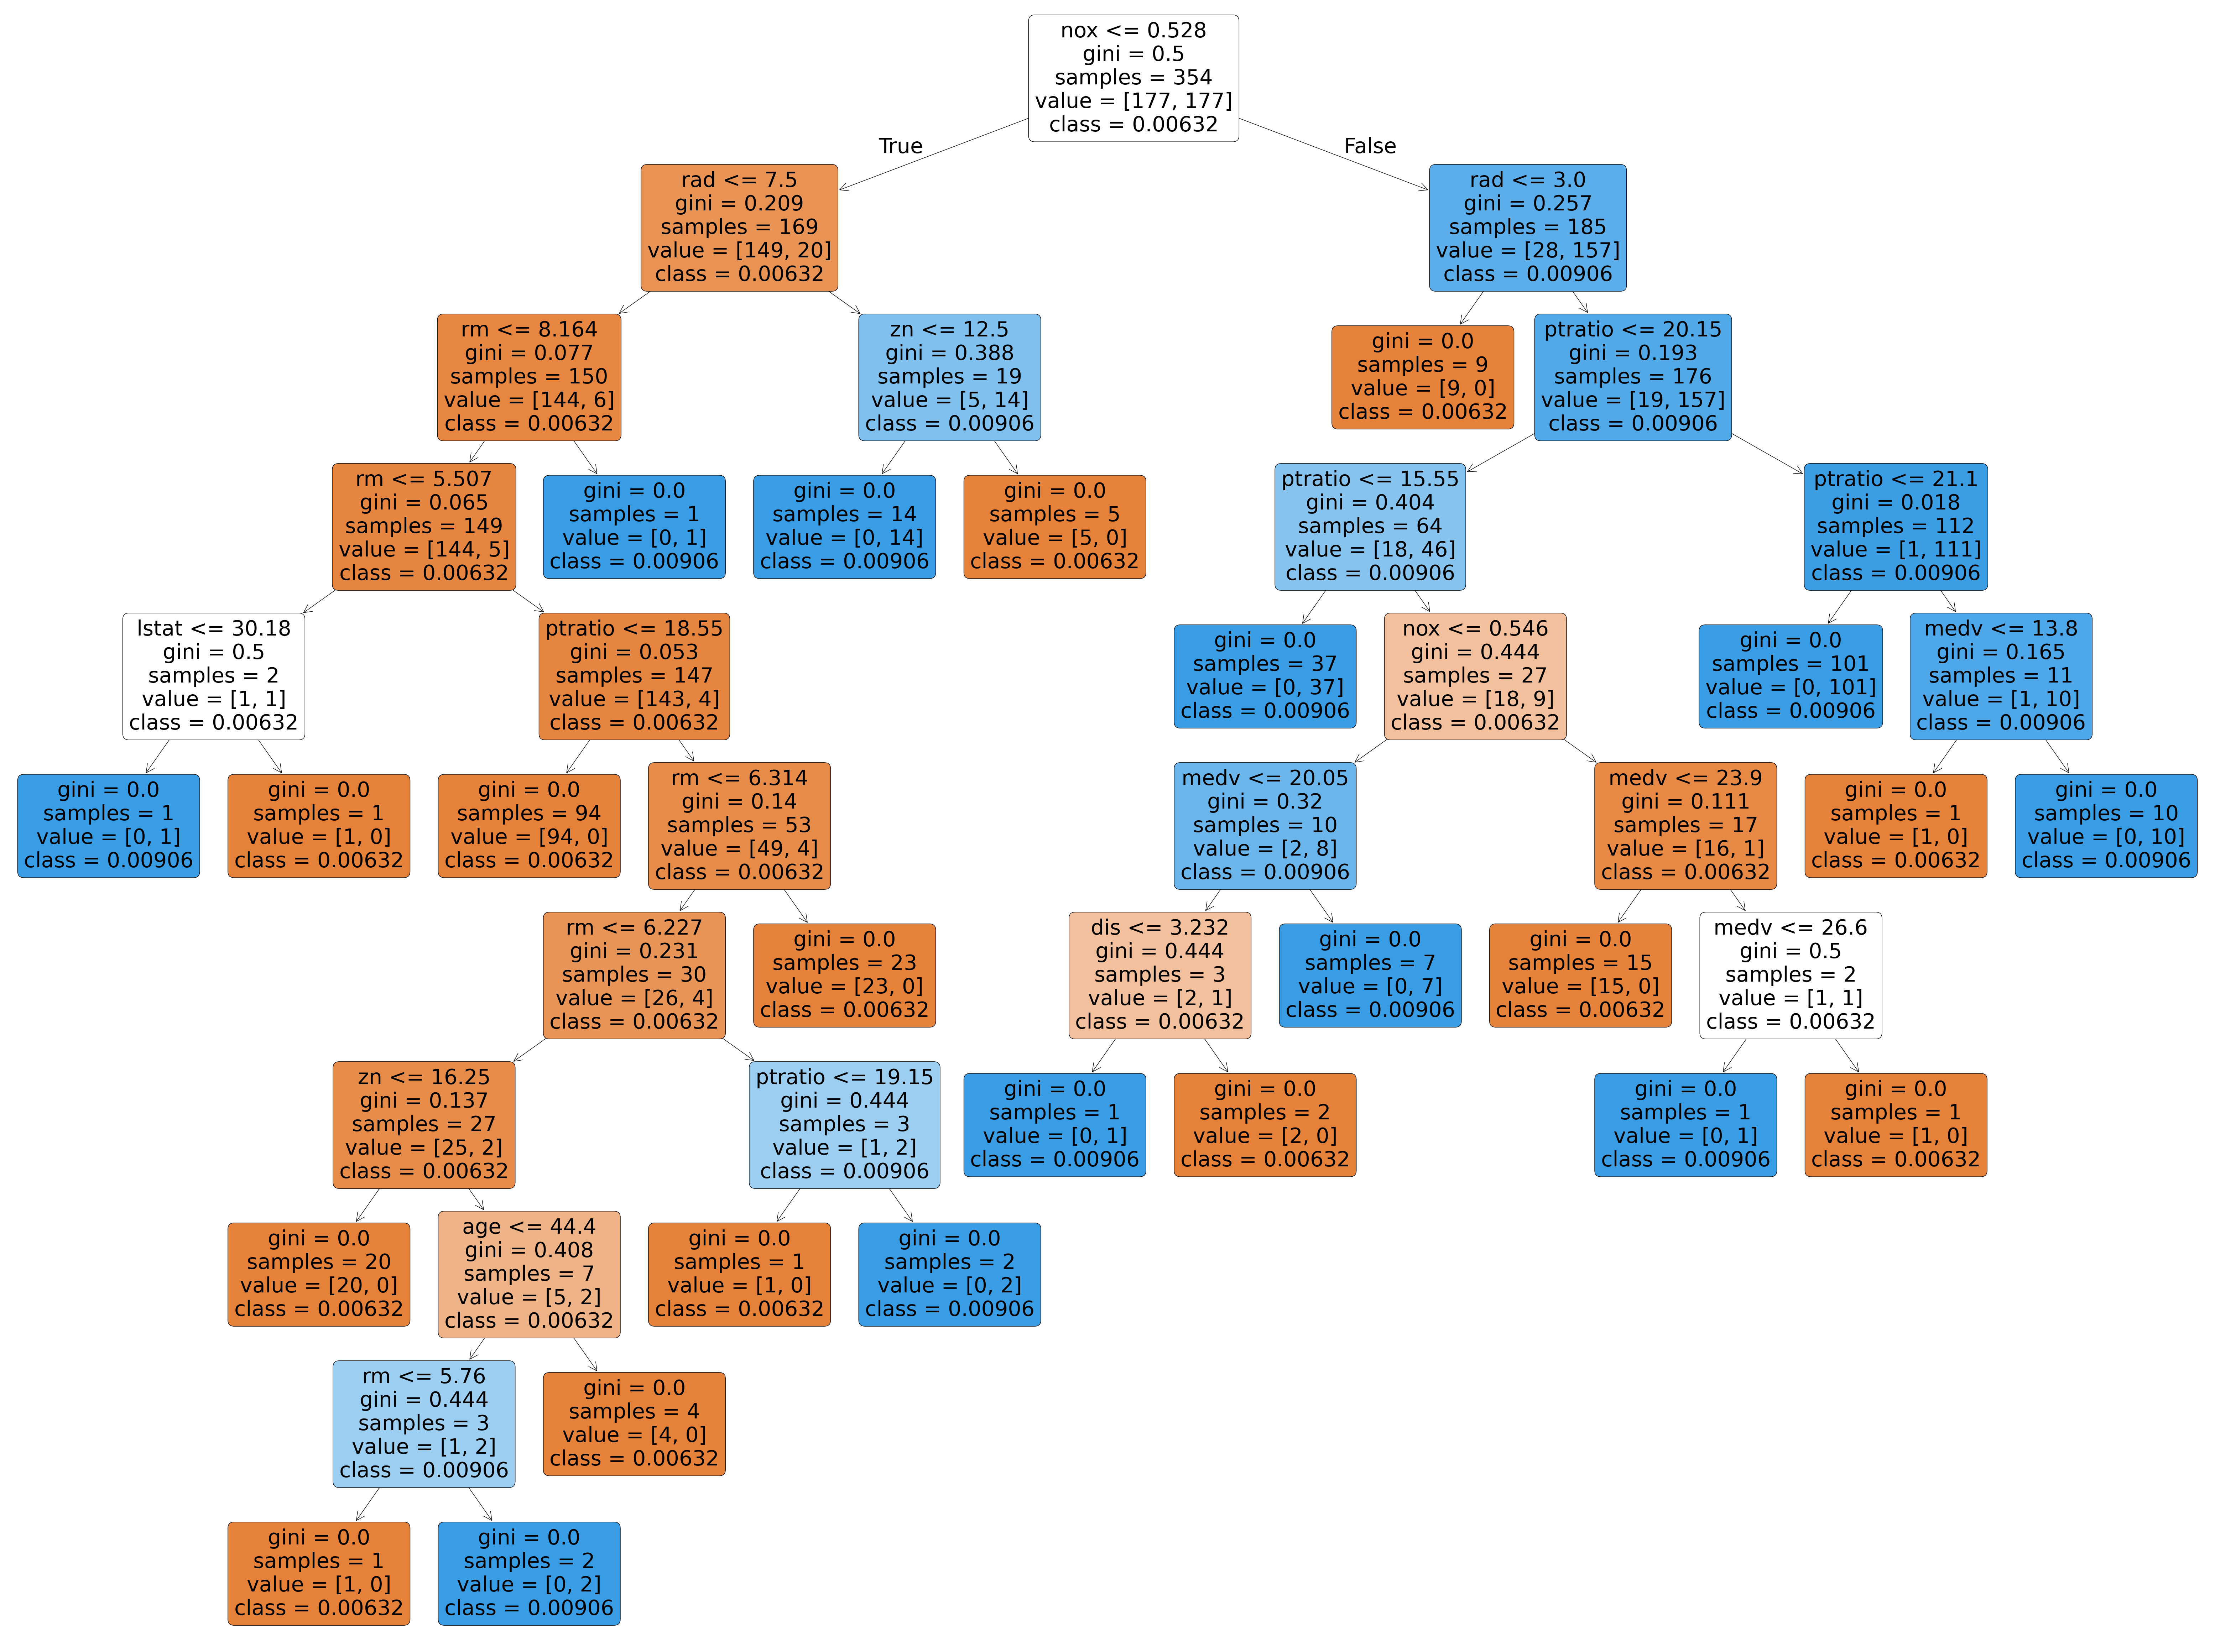

In [43]:
from sklearn.tree import plot_tree
# Визуализируем дерево решений
plt.figure(figsize=(80, 60))
plot_tree(tree_model, feature_names=X.columns, class_names=[str(item) for item in sorted(y.unique())], filled=True, rounded=True)
plt.show()